# Correlations

In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import os
if not os.path.exists("images"): 
    os.mkdir("images")
pd.set_option('display.max_columns', None)
from scipy.stats import pointbiserialr, f_oneway

In [183]:
housing_d = pd.read_csv('housing_cleaned.csv', index_col=0)

In [184]:
housing_d = housing_d.convert_dtypes()
housing_d.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2559 entries, 909176150 to 906223180
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      2559 non-null   Int64  
 1   SalePrice      2559 non-null   Int64  
 2   MSSubClass     2559 non-null   Int64  
 3   MSZoning       2559 non-null   string 
 4   LotFrontage    2559 non-null   Int64  
 5   LotArea        2559 non-null   Int64  
 6   Street         2559 non-null   string 
 7   LotShape       2559 non-null   string 
 8   LandContour    2559 non-null   string 
 9   Utilities      2559 non-null   string 
 10  LotConfig      2559 non-null   string 
 11  LandSlope      2559 non-null   string 
 12  Neighborhood   2559 non-null   string 
 13  Condition1     2559 non-null   string 
 14  Condition2     2559 non-null   string 
 15  BldgType       2559 non-null   string 
 16  HouseStyle     2559 non-null   string 
 17  OverallQual    2559 non-null   Int64  
 18  

In [149]:
#select int/float

corr_matrix = housing_d.select_dtypes(include=['float64','int64']).corr()

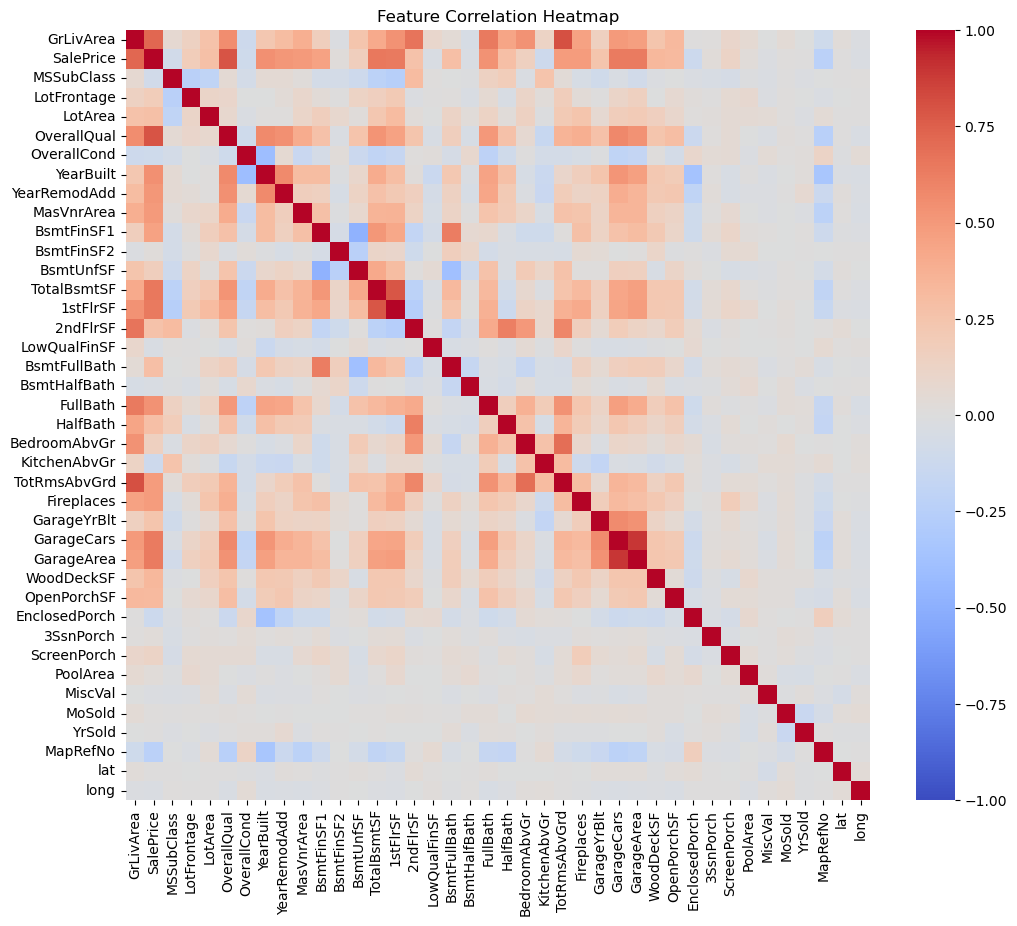

In [150]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Abs Values Feature Correlation Heatmap')

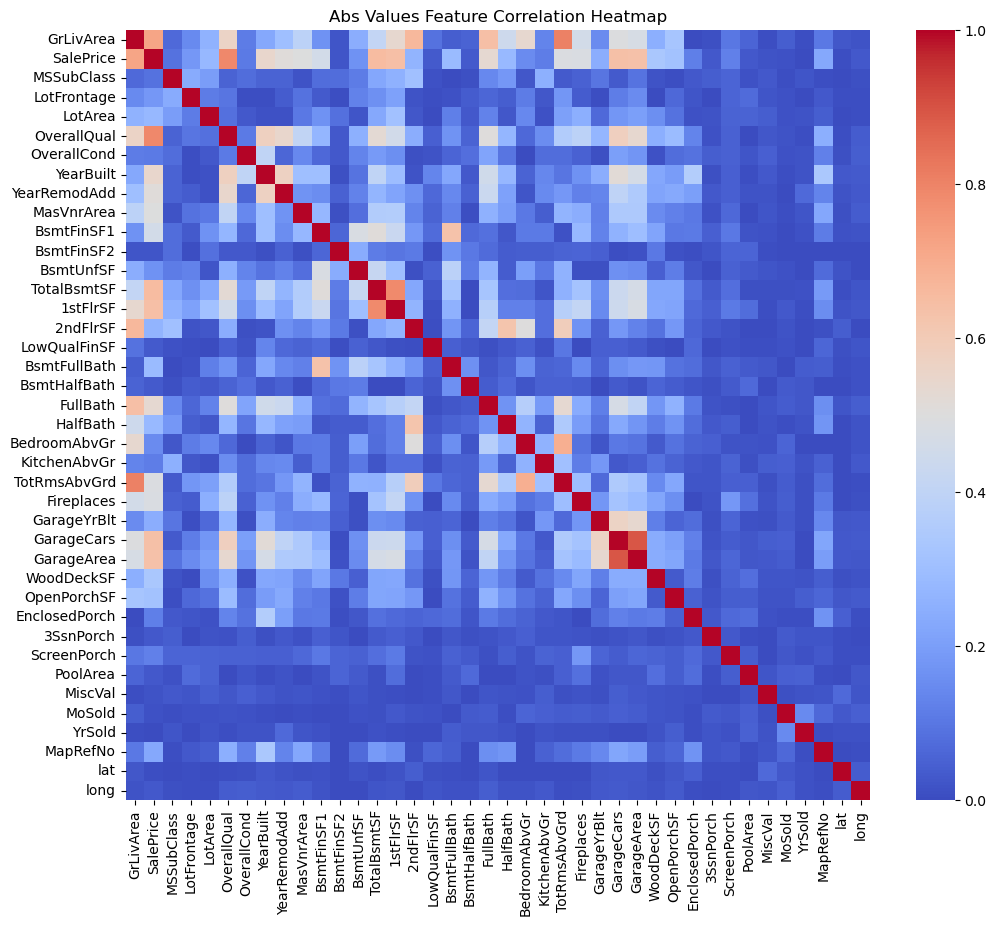

In [151]:
#absolute values

plt.figure(figsize=(12, 10))
sns.heatmap(abs(corr_matrix), cmap='coolwarm', vmin=0, vmax=1)
plt.title('Abs Values Feature Correlation Heatmap')

Text(0.5, 1.0, 'Corr Threshold Map')

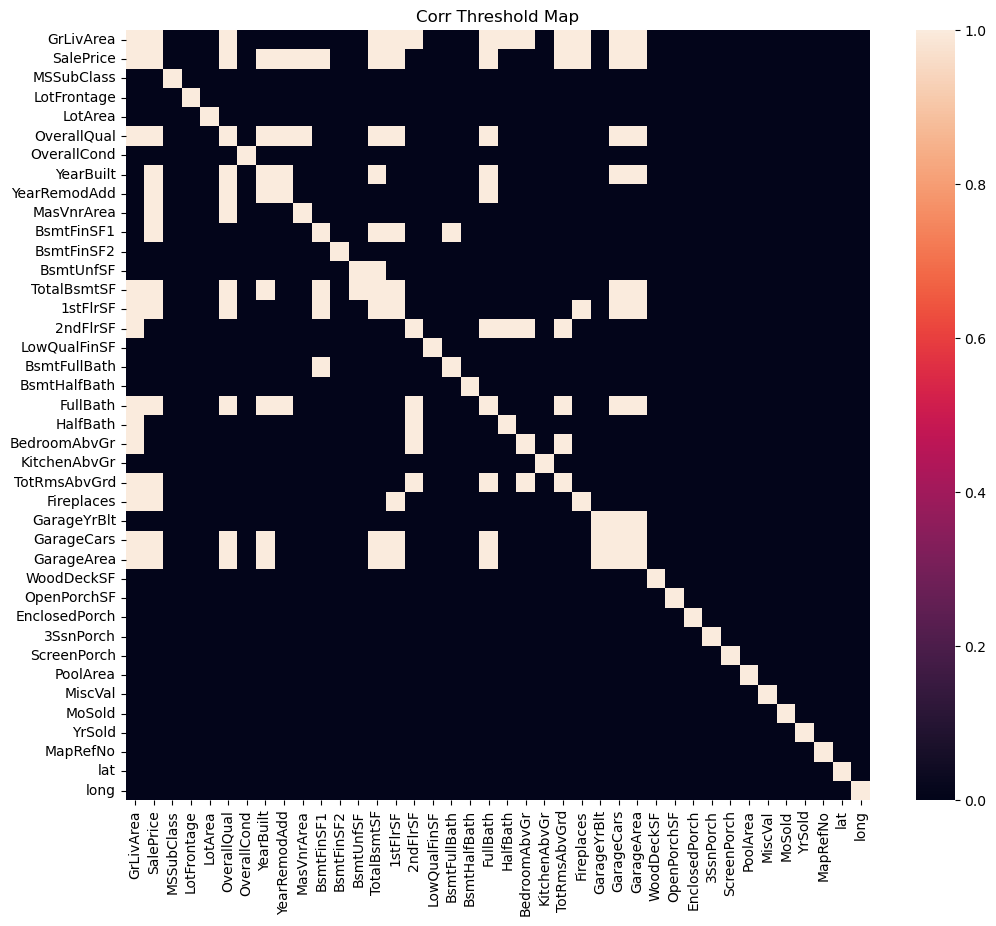

In [152]:
threshhold = .4

plt.figure(figsize=(12, 10))
sns.heatmap(abs(corr_matrix>threshhold))
plt.title('Corr Threshold Map')

#### Correlations of Features and Salesprice. 

SalePrice
SalePrice      1.000000
OverallQual    0.790285
GrLivArea      0.719803
TotalBsmtSF    0.652771
1stFlrSF       0.643106
GarageCars     0.639497
GarageArea     0.636343
YearBuilt      0.544185
FullBath       0.533333
YearRemodAdd   0.510881
MasVnrArea     0.498545
TotRmsAbvGrd   0.488849
Fireplaces     0.487173
BsmtFinSF1     0.459977
WoodDeckSF     0.332338

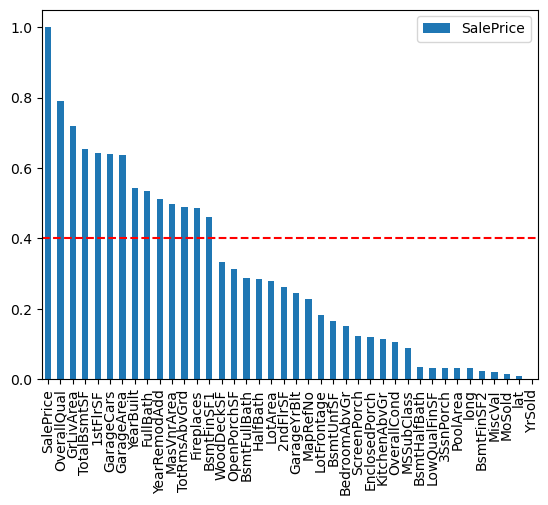

In [153]:
#Continuos variables

abs(corr_matrix[['SalePrice']]).sort_values(by = 'SalePrice', ascending = False).plot.bar()
plt.axhline(y=0.4, color='r', linestyle='--', label='y=0.5')
top_15 = abs(corr_matrix[['SalePrice']]).sort_values(by = 'SalePrice', ascending = False).head(15)
top_15
# Top 14 Cont Features in terms of correlation. 
# Overall Condition is not highly correlated to SalespPrice. 

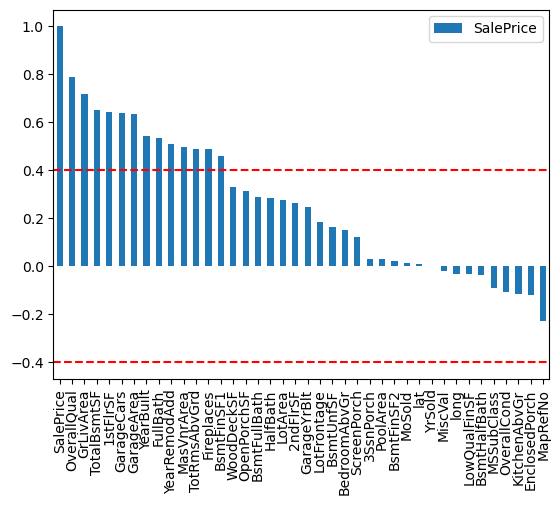

In [154]:
corr_matrix[['SalePrice']].sort_values(by = 'SalePrice', ascending = False).plot.bar()
plt.axhline(y=0.4, color='r', linestyle='--', label='y=0.5')
plt.axhline(y=-0.4, color='r', linestyle='--', label='y=0.5')

#No features that are negavtively correlated to SalePrice

In [210]:
# F statistics - The F-statistic and p-value indicate whether there are significant differences in the means of the continuous variable across different categories.

from scipy.stats import pointbiserialr, f_oneway
housing_s = housing_d.copy()
test = []
for columns in housing_s.select_dtypes(
    include=['string']).drop(
    columns = 'Prop_Addr').columns:
    housing_s[columns] = housing_d[columns].astype('category').cat.codes
    groups = [housing_s[housing_s[columns] == label]['SalePrice'] for label in housing_s[columns].unique()]
    anova_result = f_oneway(*groups)
    test.append([columns, anova_result.statistic,anova_result.pvalue])
cat_corr = pd.DataFrame(test, columns=['Feature','F_Statistic', 'P_Value'])
cat_corr

Feature  F_Statistic        P_Value
0        MSZoning    66.434319   2.103725e-65
1          Street     4.745197   2.947125e-02
2        LotShape    87.292790   9.009807e-54
3     LandContour    29.749053   6.694355e-19
4       Utilities     0.713924   3.982234e-01
5       LotConfig    13.994054   2.687440e-11
6       LandSlope     8.902709   1.402838e-04
7    Neighborhood   130.811820   0.000000e+00
8      Condition1    15.360388   3.080254e-22
9      Condition2     9.542768   9.446360e-12
10       BldgType    22.105531   5.821985e-18
11     HouseStyle    27.829478   4.152773e-37
12      RoofStyle    32.069774   8.548417e-32
13       RoofMatl     9.153563   6.179998e-10
14    Exterior1st    33.235828   1.358374e-82
15    Exterior2nd    31.042150   6.470317e-82
16     MasVnrType   174.064083  1.111144e-102
17      ExterQual   796.063256   0.000000e+00
18      ExterCond    12.858937   2.292559e-10
19     Foundation   185.820459  4.134508e-169
20       BsmtQual   476.453472   0.000000e+00
21       BsmtCond    26.265834   5.911518e-26
22   BsmtExposure   142.800046  2.704178e-110
23   BsmtFinType1   125.023875  6.650542e-139
24   BsmtFinType2    12.337926   9.753750e-14
25        Heating     4.159339   9.130604e-04
26      HeatingQC   160.851491  6.395566e-123
27     CentralAir   171.720003   5.085068e-38
28     Electrical    48.379557   2.089771e-30
29    KitchenQual   536.246989   0.000000e+00
30     Functional     5.662869   7.420295e-06
31     GarageType   129.284281  3.731344e-143
32   GarageFinish   346.688045  7.302997e-189
33     GarageQual    47.544017   3.806785e-47
34     GarageCond    42.463566   3.826620e-42
35     PavedDrive    96.075572   5.873001e-41
36         PoolQC     7.678239   3.796341e-06
37          Fence    23.926292   1.866590e-19
38    MiscFeature     2.793719   2.487760e-02
39       SaleType    24.862952   2.623129e-41
40  SaleCondition    39.879540   1.385461e-39

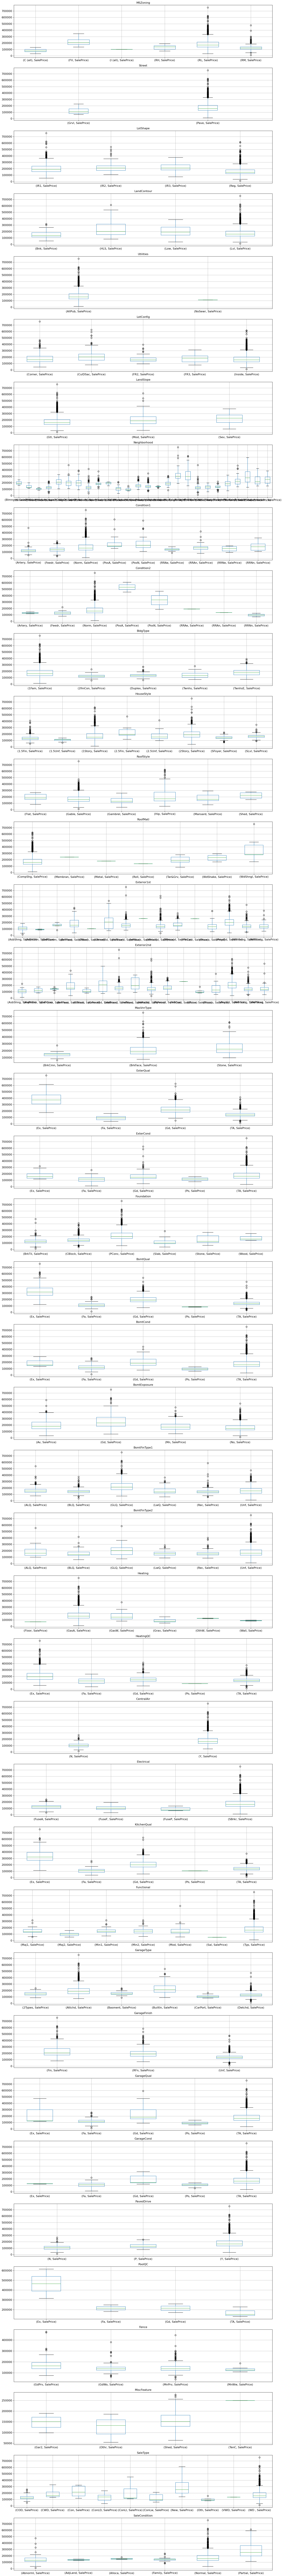

In [282]:
#Boxplots by categroical features

fig, axs = plt.subplots(41, 1, figsize=(20, 200))
for num, column in enumerate(housing_d.select_dtypes(include='string').drop(columns = 'Prop_Addr').columns):
    housing_d[[column,'SalePrice']].reset_index().groupby(column).boxplot(
        fontsize=12, column = 'SalePrice', subplots = False, ax = axs[num])
    axs[num].set_title(column)
    axs[num].grid(True)
plt.show()

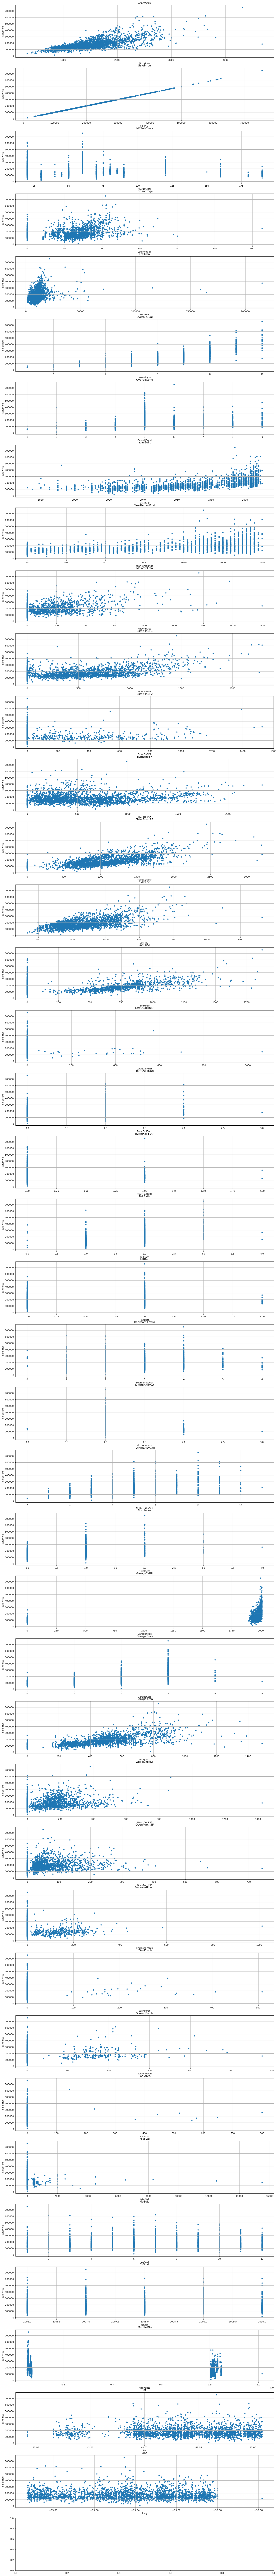

In [287]:
#Continuous variables
fig, axs = plt.subplots(41, 1, figsize=(20, 200))
for num, column in enumerate(housing_d.select_dtypes(include=['int','float']).columns):
    housing_d[[column,'SalePrice']].plot.scatter(x=column, y = 'SalePrice', ax = axs[num])
    axs[num].set_title(column)
    axs[num].grid(True)
plt.show()

# housing_d[['GrLivArea','SalePrice']].plot.scatter(x = 'GrLivArea', y = 'SalePrice')